In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

#dataset#
disease_df = pd.read_csv("/content/Spring_induction.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)
 
#removing NaN / NULL values#
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  ...  heartRate  glucose  TenYearCHD
0         1   39              0  ...       80.0     77.0           0
1         0   46              0  ...       95.0     76.0           0
2         1   48              1  ...       75.0     70.0           0
3         0   61              1  ...       65.0    103.0           1
4         0   46              1  ...       85.0     85.0           0

[5 rows x 15 columns] (3749, 15)
0    3177
1     572
Name: TenYearCHD, dtype: int64


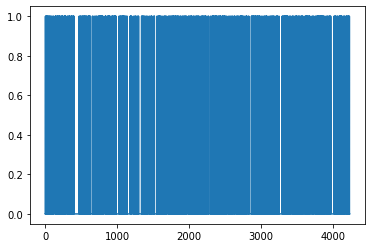

In [ ]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

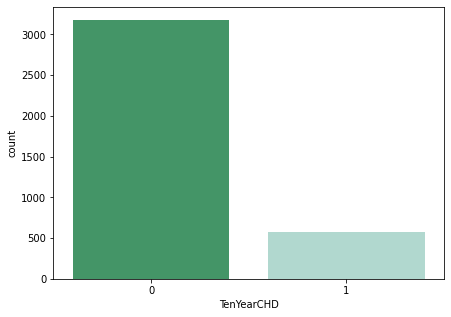

In [ ]:

# counting no. of patients affected with CHD
plt.figure(figsize = (7, 5))
sn.countplot(x ='TenYearCHD', data = disease_df,
             palette ="BuGn_r" )
plt.show()

In [ ]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])
 
# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
 
# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2999, 6) (2999,)
Test set: (750, 6) (750,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
 
# Evaluation and accuracy
from sklearn.metrics import jaccard_score
print('')
print('Accuracy of the model in jaccard similarity score is = ',
      jaccard_score(y_test, y_pred))


Accuracy of the model in jaccard similarity score is =  0.12307692307692308


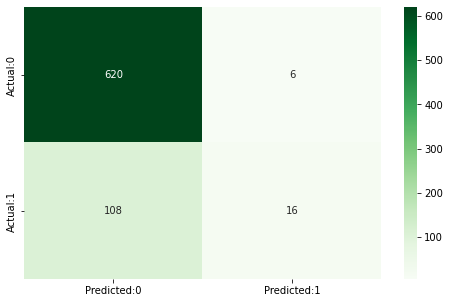

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       626
           1       0.73      0.13      0.22       124

    accuracy                           0.85       750
   macro avg       0.79      0.56      0.57       750
weighted avg       0.83      0.85      0.80       750



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
 
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
 
# Evaluation and accuracy
from sklearn.metrics import jaccard_score
print('')
print('Accuracy of the model in jaccard similarity score is = ',
      jaccard_score(y_test, y_pred))